# SciPy tutorial

[`SciPy`](https://www.scipy.org/) is the core library for scientific computing in Python. It provides many user-friendly and efficient numerical routines, such as routines for numerical integration, interpolation, optimization, linear algebra, and **statistics**. `SciPy` is composed of task-specific sub-modules as follows. 

|Submodule|Fields|
|:---|:---|
|scipy.cluster|Vector quantization / Kmeans|
|scipy.constants|Physical and mathematical constant|
|scipy.fftpack|Fourier transform|
|scipy.integrate|Integration routines|
|scipy.interpolate|Interpolation|
|scipy.io|Data input and output|
|scipy.linalg|Linear algebra routines|
|scipy.ndimage|n-dimensional image package|
|scipy.odr|Orthogonal distance regression|
|scipy.optimize|Optimization|
|scipy.signal|Signal processing|
|scipy.sparse|Sparse matrices|
|scipy.spatial|Spatial data structures and algorithms|
|scipy.special|Any special mathematical functions|
|<u>**scipy.stats**</u>|<u>**Statistics**</u>|

`scipy.stats` module contains a large number of summary and frequency statistics, probability distributions, correlation functions, statistical tests, kernel density estimation, quasi-Monte Carlo functionality, and more. 

In this tutorial, we will cover:
* `scipy.stats`: Statistics, Distributions, Statistical tests and Correlations
* Extreme Value Analysis

All `scipy` sub-modules depend on `numpy`, but are mostly independent of each other. The standard way of importing NumPy and these SciPy modules is:

In [1]:
import numpy as np
from scipy import stats

print(stats.__name__)

scipy.stats


## Descriptive Statistics

When we have a new dataset in hand, we often wish to have an instant describing or summarizing view of the data. This could normally be done through two main approaches:
1. ***The quantitative approach*** describes and summarizes data numerically using statistics.
2. ***The visual approach*** illustrates data with charts, plots, histograms, and other graphs.

In this tutorial, we focus on the quantitative approach using the `SciPy` package. The visual approach will be covered in the tutorial of `matplotlib`.

There are multiple ways to obtain specific discriptive statistics of the dataset. Note that `SciPy` is established based on `NumPy` and it offers additional functionality compared to `NumPy`. Common statistics already exists in `NumPy` (such as `mean`, `median`, `var` and so on). For more complicated statistics such as `iqr`, `skew`, `kurtosis` and so on, we need to use `scipy.stats`.

In [2]:
A = np.array([[10, 14, 11, 7, 9.5], [8, 9, 17, 14.5, 12],
              [15, 7, 11.5, 10, 10.5], [11, 11, 9, 12, 14]])
print(A)
# Mean (Location Parameter)
print("Mean: ", np.mean(A, axis=0))

# Median (Location Parameter)
print("Median: ", np.median(A, axis=0))

# Variance (Scale Parameter)
print("Variance: ", np.var(A, axis=0, ddof=1))  #ddof=1 provides an unbiased estimator of the variance

# IQR (Scale Parameter)
print("IQR: ", stats.iqr(A, axis=0))

# Skewness (Shape Parameter)
print("Skewness: ", stats.skew(A, axis=0))

# Kurtosis (Shape Parameter)
print("Kurtosis: ", stats.kurtosis(A, axis=0, bias=False))

[[10.  14.  11.   7.   9.5]
 [ 8.   9.  17.  14.5 12. ]
 [15.   7.  11.5 10.  10.5]
 [11.  11.   9.  12.  14. ]]
Mean:  [11.    10.25  12.125 10.875 11.5  ]
Median:  [10.5  10.   11.25 11.   11.25]
Variance:  [ 8.66666667  8.91666667 11.72916667 10.0625      3.83333333]
IQR:  [2.5   3.25  2.375 3.375 2.25 ]
Skewness:  [ 0.54309084  0.24394285  0.80172768 -0.11813453  0.34616807]
Kurtosis:  [ 1.5        -0.41610621  2.53815357 -0.32082096 -0.768431  ]


As we often use `pandas` to handle data, we could use the Pandas function `describe()` to have an instant look at summarizing statistics of the DataFrame (or Series). Next is an example of summarizing daily rainfall.

In [3]:
import pandas as pd

dr = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, parse_dates=True)
print(dr.head())
print(dr.describe())

            Daily Rainfall Total (mm)
Date                                 
1981-01-01                        0.0
1981-01-02                        0.0
1981-01-03                        0.0
1981-01-04                        0.0
1981-01-05                        0.0
       Daily Rainfall Total (mm)
count               14610.000000
mean                    5.721629
std                    14.194586
min                     0.000000
25%                     0.000000
50%                     0.000000
75%                     4.200000
max                   216.200000


We could also get specific statistics by directly operating on the DataFrame. In this case, the unbiased estimator is used by default.

In [4]:
# Mean (Location Parameter)
print(dr.mean())

# Median (Location Parameter)
print(dr.median())

# Variance (Scale Parameter)
print(dr.var())

# Skewness (Shape Parameter)
print(dr.skew())

# Kurtosis (Shape Parameter)
print(dr.kurtosis())

Daily Rainfall Total (mm)    5.721629
dtype: float64
Daily Rainfall Total (mm)    0.0
dtype: float64
Daily Rainfall Total (mm)    201.486277
dtype: float64
Daily Rainfall Total (mm)    5.130516
dtype: float64
Daily Rainfall Total (mm)    40.832293
dtype: float64


## Distributions

`scipy.stats` contains a lot of objects for specific distributions, including **continuous distributions** and **discrete distributions**.

+ **continuous distributions**

Some examples are `norm` (normal distribution), `gamma` (gamma distribution), `uniform` (uniform distribution) and so on. Each object of continuous distributions comes with many useful methods, such as its PDF (probability density function), its CDF (cumulative density function) and so on.

Normally, we would directly import specific distributions into Python for convenience. Next is the example of a normal distribution whose mean is 5 and standard deviation is 2.

In [5]:
from scipy.stats import norm

bins = np.arange(5-3*2, 5+3*2, 0.01)

PDF = norm.pdf(bins, loc=5, scale=2)  # generate PDF in bins
CDF = norm.cdf(bins, loc=5, scale=2)  # generate CDF in bins
SF = norm.sf(bins, loc=5, scale=2)  # generate survival function (1-CDF)
PPF = norm.ppf(0.5, loc=5, scale=2)  # obtain percent point (inverse of CDF)
RVS = norm.rvs(loc=5, scale=2, size=1000)  # generate 1000 random variates
MMS = norm.stats(loc=5, scale=2, moments='mvsk')  # obtain the four moments

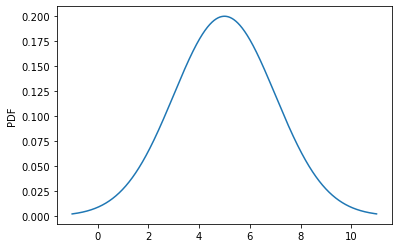

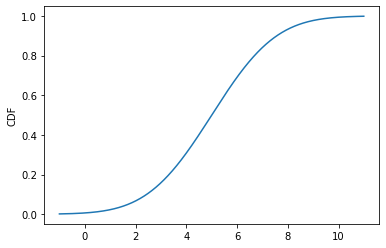

In [6]:
import matplotlib.pyplot as plt

plt.plot(bins, PDF)
plt.ylabel("PDF")
plt.show()

plt.plot(bins, CDF)
plt.ylabel("CDF")
plt.show()

One common practice is to fit a dataset into a distribution. Next is an example.

5.170662443123031 1.9637819405171413


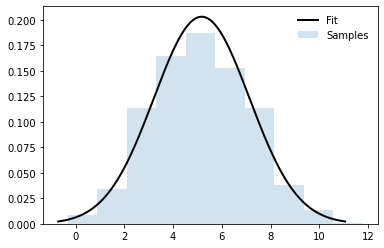

In [7]:
samples = norm.rvs(loc=5, scale=2, size=1000)  # pesudo dataset
mu, sigma = norm.fit(samples, method="MLE")  # do a maximum-likelihood fit
print(mu, sigma)

# Plot figure
bins = np.arange(mu - 3 * sigma, mu + 3 * sigma, 0.01)
plt.hist(samples, density=True, histtype='stepfilled',
         alpha=0.2, label='Samples')
plt.plot(bins, norm.pdf(bins, loc=mu, scale=sigma),
         'k-', lw=2, label='Fit')
plt.legend(loc='best', frameon=False)
plt.show()

::: {note}
The distribution objects in `scipy.stats` could be employed in two ways. The first is to input the distribution parameters every time, as in the example above. The other way is to create a "frozen" distribution object by fixing the distribution parameters. For example, `distr = norm(loc=5, scale=2)`. The example in the following section of discrete distributions employs this way. 
:::

+ **discrete distributions**

Some examples are `bernoulli` (Bernoulli distribution), `binom` (binomial distribution), `poisson` (poisson distribution) and so on. Similarly, each object of discrete distributions comes with some useful methods, such as its PMF (probability mass function), its CDF (cumulative distribution function) and so on.

In [8]:
from scipy.stats import binom

n, p = 5, 0.4
distr = binom(n, p)  # create an instance of binom
x = np.arange(0, 5)

PMF = distr.pmf(x)  # generate PMF in x
CDF = distr.cdf(x)  # generate CDF in x
MMS = distr.stats(moments='mvsk')  # obtain the four moments
RVS = distr.rvs(size=1000)  # generate random variates

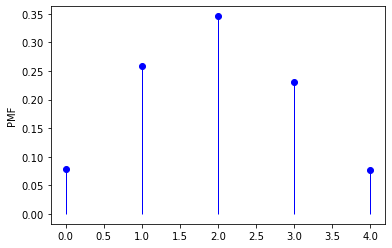

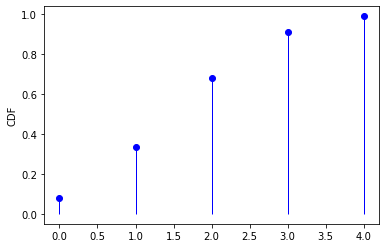

In [9]:
plt.plot(x, PMF, 'bo')
plt.vlines(x, 0, PMF, 'b', lw=1)
plt.ylabel("PMF")
plt.show()

plt.plot(x, CDF, 'bo')
plt.vlines(x, 0, CDF, 'b', lw=1)
plt.ylabel("CDF")
plt.show()

For a full list of probability distributions in `scipy.stats`, please refer to this [official website](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions).

## Statistical Tests

A statistical test is a decision indicator. `scipy.stats` contains a lot of common statistical tests, such as `ttest_ind` (T-test for the means of two independent samples), `kstest` (Kolmogorov-Smirnov test for goodness of fit) and so on.

For instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we can use a T-test to decide whether the means of two sets of observations are significantly different.

In [10]:
a = np.random.normal(0, 1, size=100)  # Sample A
b = np.random.normal(1, 1, size=10)   # Sample B
T, p = stats.ttest_ind(a, b)          # T-test
print(T, p)

-4.700353057494126 7.705251272969022e-06


The resulting output in this case is composed of:
* T statistic value: it is a number the sign of which is proportional to the difference between the two random processes and the magnitude is related to the significance of this difference.
* p value: the probability of both processes being identical. If it is close to 1, the two process are almost certainly identical. The closer it is to zero, the more likely it is that the processes have different means.

For a full list of supported statistical tests in `scipy.stats`, please refer to this [official website](https://docs.scipy.org/doc/scipy/reference/stats.html#correlation-functions).

## Correlations

`scipy.stats` contains some basic correlation functions, such as `pearsonr` (Pearson correlation coefficient), `spearmanr` (Spearman correlation coefficient), `kendalltau` (Kendall’s tau correlation measure) and so on. Next is an example of `kendalltau` for annual rainfall.

In [11]:
dr = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, parse_dates=True)
yr = dr.resample("Y", label="right").sum()  # aggregate annual rainfall total
yr.index = yr.index.year
yr.columns = ["Yearly Rainfall Total (mm)"]
print(yr.head())

tau, p = stats.kendalltau(yr.index, yr)
# tau is Kendall’s tau measure and p is the corresponding p-value
print(tau, p)

      Yearly Rainfall Total (mm)
Date                            
1981                      1336.3
1982                      1581.7
1983                      1866.5
1984                      2686.7
1985                      1483.9
-0.0358974358974359 0.7442511261559122


For more advanced regression models, you may refer to the third-party [machine learning package](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) `sklearn`, which is also built on NumPy, SciPy and matplotlib. A brief beginner guide of this could also be found in [RealPython](https://realpython.com/linear-regression-in-python/).

## Extreme Value Analysis

Extreme value analysis (EVA) is a process primarily to estimate the probability of events that are more extreme than any previously observed. It is widely applied in many fields such as engineering, meteorology, hydrology, finance, etc. For example, we could use EVA to estimate the probability distributions of extreme events and correspondingly estimate the magnitudes of extreme events under specific return periods.

In this section, we will take a series of streamflow as an example to show the extreme value analysis for ***annual 5-day low-flow*** in Python step by step.

### Extract extreme values

We first load the daily streamflow data from file using `pandas` and calculate the 5-day moving average of streamflow.

In [12]:
# Load Data
ds = pd.read_csv('../../assets/data/Runoff_02401390.dat', delimiter='\s+', 
                 index_col=0, header=None, parse_dates=True)
ds.columns = ["Streamflow"]
ds.index.name = 'Date'
ds.head()

,Streamflow
Date,
1981-01-01,40.0
1981-01-02,39.0
1981-01-03,41.0
1981-01-04,39.0
1981-01-05,37.0


            5-day flow
Date                  
1981-01-01         NaN
1981-01-02         NaN
1981-01-03        39.2
1981-01-04        38.4
1981-01-05        39.4
      Annual low-flow
Date                 
1981             11.2
1982             19.2
1983             19.8
1984             17.6
1985             25.4


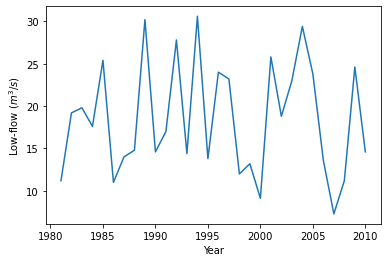

In [13]:
# Calculate 5-day flow
ds5day = ds.rolling(5, center=True).mean()
ds5day.columns = ["5-day flow"]
print(ds5day.head())

# Extract annual low-flow
lowf = ds5day.resample("Y").min()
lowf.index = lowf.index.year
lowf.columns = ["Annual low-flow"]
print(lowf.head())

# Plot annual 5-day low-flow
plt.plot(lowf)
plt.xlabel("Year")
plt.ylabel("Low-flow ($m^3/s$)")
plt.show()

### Fit distribution (parameter estimation)

Next, we fit a distribution to the low-flow data. We assume that annual low-flow follows a generalized extreme value (GEV) distribution `genextreme(c, loc=loc, scale=scale)`, which has three parameters: `loc` (location parameter), `scale` (scale parameter) and `c` (shape parameter).

In [14]:
from scipy.stats import genextreme as gev

Here, we introduce two methods to estimate the parameters, inluding the maximum likelihood method (MLE) and the L-moments method.

+ maximum likelihood method (MLE)

In [15]:
c0, loc0, scale0  = gev.fit(lowf, method="MLE")
print(loc0, scale0, c0)
MLEGEV = gev(c0, loc=loc0, scale=scale0)  # Frozen distribution

15.808425716808408 5.941316015077605 0.16158787388446866


+ method of L-moments (LMM)

In the context of EVA, observations were used to fit the distributions of extreme events, which tend to follow a distribution more complicated than the normal distribution in essence. The method of L-moments is more recommended in this case. More information and specific advantages of L-moments could be referred to [WikiPedia](https://en.wikipedia.org/wiki/L-moment#:~:text=the%20Wakeby%20distributions.-,Usage,-%5Bedit%5D) page.

However, `scipy.stats` only includes the common MLE method and method of moments for parameter estimation. We need to code the method of L-moments.

The L-moments are established based on the probability weighted moments, so in order to calculate L-moments of samples, we need to calculate probability weighted moments of samples. Assume a set of samples $X_j (X_1>X_2>...>X_n)$, probability weighted moments of samples are as follows.
$$
\begin{align}
& b_0=\overline{X} \\
& b_1=\sum_{j=1}^{n-1} \frac{(n-j)X_j}{n(n-1)}\\
& b_2=\sum_{j=1}^{n-2} \frac{(n-j)(n-j-1)X_j}{n(n-1)(n-2)}
\end{align}
$$
where $b_0, b_1, b_2$ are the first three unbiased probability weighted moments.

The relationship between the first three L-moments and probability weighted moments are 
$$
\begin{align}
& \lambda_1=b_0\\
& \lambda_2=2b_1-b_0\\
& \lambda_3=6b_2-6_b1+b_0\\
\end{align}
$$
where $\lambda_0, \lambda_1, \lambda_2$ are the first three unbiased probability weighted moments.

In [16]:
# Calculate L-moments based on samples

def samlmom3(sample):
    """
    samlmom3 returns the first three L-moments of samples
    sample is the 1-d array
    n is the total number of the samples, j is the j_th sample
    """
    n = len(sample)
    sample = np.sort(sample)[::-1]
    b0 = np.mean(sample)
    b1 = np.array([(n - j - 1) * sample[j] / n / (n - 1)
                   for j in range(n)]).sum()
    b2 = np.array([(n - j - 1) * (n - j - 2) * sample[j] / n / (n - 1) / (n - 2)
                   for j in range(n - 1)]).sum()
    lmom1 = b0
    lmom2 = 2 * b1 - b0
    lmom3 = 6 * (b2 - b1) + b0

    return lmom1, lmom2, lmom3


LMM = samlmom3(np.array(lowf["Annual low-flow"]))
print(LMM)

(18.5, 3.8837241379310328, 0.37207881773398555)


There is a relationship between the L-moments for some specific distributions. We may rely on this to obtain estimated parameters based on the sample L-moments. A numerical approximation method was proposed by [Donaldson (1996)](https://www.tandfonline.com/doi/abs/10.1080/03610919608813340).

In [17]:
# Estimate GEV parameters

from scipy import special
from collections import OrderedDict
import math

def pargev(lmom):
    """
    pargev estimates the parameters of the Generalized Extreme Value 
    distribution given the L-moments of the data
    """
    lmom_ratios = [lmom[0], lmom[1], lmom[2]/lmom[1]]
    
    SMALL = 1e-5
    eps = 1e-6
    maxit = 20
    
    # EU IS EULER'S CONSTANT
    EU = 0.57721566
    DL2 = math.log(2)
    DL3 = math.log(3)

    # COEFFICIENTS OF RATIONAL-FUNCTION APPROXIMATIONS FOR K
    A0 = 0.28377530
    A1 = -1.21096399
    A2 = -2.50728214
    A3 = -1.13455566
    A4 = -0.07138022
    B1 = 2.06189696
    B2 = 1.31912239
    B3 = 0.25077104
    C1 = 1.59921491
    C2 = -0.48832213
    C3 = 0.01573152
    D1 = -0.64363929
    D2 = 0.08985247
    
    T3 = lmom_ratios[2]

    if T3 <= 0:
        G = (A0 + T3 * (A1 + T3 * (A2 + T3 * (A3 + T3 * A4)))) / (1 + T3 * (B1 + T3 * (B2 + T3 * B3)))

        if T3 >= -0.8:
            para3 = G
            GAM = math.exp(special.gammaln(1 + G))
            para2 = lmom_ratios[1] * G / (GAM * (1 - 2 ** -G))
            para1 = lmom_ratios[0] - para2 * (1 - GAM) / G
            return para1, para2, para3
        elif T3 <= -0.97:
            G = 1 - math.log(1 + T3) / DL2

        T0 = (T3 + 3) * 0.5
        for IT in range(1, maxit):
            X2 = 2 ** -G
            X3 = 3 ** -G
            XX2 = 1 - X2
            XX3 = 1 - X3
            T = XX3 / XX2
            DERIV = (XX2 * X3 * DL3 - XX3 * X2 * DL2) / (XX2 ** 2)
            GOLD = G
            G -= (T - T0) / DERIV

            if abs(G - GOLD) <= eps * G:
                para3 = G
                GAM = math.exp(special.gammaln(1 + G))
                para2 = lmom_ratios[1] * G / (GAM * (1 - 2 ** -G))
                para1 = lmom_ratios[0] - para2 * (1 - GAM) / G
                return para1, para2, para3
        raise Exception("Iteration has not converged")
    else:
        Z = 1 - T3
        G = (-1 + Z * (C1 + Z * (C2 + Z * C3))) / (1 + Z * (D1 + Z * D2))
        if abs(G) < SMALL:
            para2 = lmom_ratios[1] / DL2
            para1 = lmom_ratios[0] - EU * para2
            para3 = 0
        else:
            para3 = G
            GAM = math.exp(special.gammaln(1 + G))
            para2 = lmom_ratios[1] * G / (GAM * (1 - 2 ** -G))
            para1 = lmom_ratios[0] - para2 * (1 - GAM) / G
        return para1, para2, para3


loc1, scale1, c1 = pargev(LMM)
print(loc1, scale1, c1)
LMMGEV = gev(c1, loc=loc1, scale=scale1)  # Frozen distribution

15.587575475184854 6.182949767501039 0.11881328920002591


### Compare with empirical distribution

As we have assumed the probability distributions of annual low-flow, it is necessary to examine the performance in characterizing the observation datasets of this distribution along with estimated parameters. Here, we first examine this by directly looking at the ***probability density function (PDF)*** and ***cumulative distribution function (CDF)***; then, we examine this through ***statistical inference***.

+ probability density function

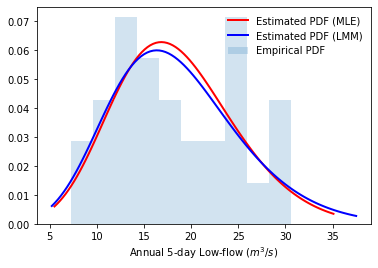

In [18]:
# Plot empirical PDF
plt.hist(lowf, density=True, histtype='stepfilled',
         alpha=0.2, label='Empirical PDF')
# Plot estimated PDF based on maximum likelihood method
bins = np.linspace(MLEGEV.ppf(0.01), MLEGEV.ppf(0.99), 100)
plt.plot(bins, MLEGEV.pdf(bins),
         'r-', lw=2, label='Estimated PDF (MLE)')
# Plot estimated PDF based on the method of L-moments
bins = np.linspace(LMMGEV.ppf(0.01), LMMGEV.ppf(0.99), 100)
plt.plot(bins, LMMGEV.pdf(bins),
         'b-', lw=2, label='Estimated PDF (LMM)')

plt.xlabel("Annual 5-day Low-flow ($m^3/s$)")
plt.legend(loc='best', frameon=False)
plt.show()

+ cumulative distribution function

Since we are often more concerned about the rare cases of extreme events (which lies at the right edge of PDF), it is also common practice to plot CDF to have a check.

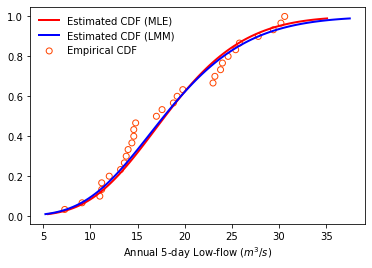

In [19]:
# Plot empirical CDF
plt.scatter(lowf.sort_values(by = ["Annual low-flow"]),
            np.arange(1, lowf.size+1, dtype=float)/lowf.size,
            color = 'orangered', facecolors='none', label='Empirical CDF')
# Plot estimated PDF based on maximum likelihood method
bins = np.linspace(MLEGEV.ppf(0.01), MLEGEV.ppf(0.99), 100)
plt.plot(bins, MLEGEV.cdf(bins), 
         'r-', lw=2, label='Estimated CDF (MLE)')
# Plot estimated PDF based on the method of L-moments
bins = np.linspace(LMMGEV.ppf(0.01), LMMGEV.ppf(0.99), 100)
plt.plot(bins, LMMGEV.cdf(bins), 
         'b-', lw=2, label='Estimated CDF (LMM)')

plt.xlabel("Annual 5-day Low-flow ($m^3/s$)")
plt.legend(loc='best', frameon=False)
plt.show()

+ statistical inference: Kolmogorov-Smirnov(KS) test

There are several tests available to test the performances of distribution fits. Here we used the Kolmogorov-Smirnov(KS) test, which is available in `scipy.stats.kstest`. This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution. If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

In [20]:
MLEKS = stats.kstest(lowf["Annual low-flow"], MLEGEV.ppf(np.arange(1, lowf.size+1, dtype=float)/lowf.size))
print(MLEKS)
LMMKS = stats.kstest(lowf["Annual low-flow"], LMMGEV.ppf(np.arange(1, lowf.size+1, dtype=float)/lowf.size))
print(LMMKS)

KstestResult(statistic=0.16666666666666666, pvalue=0.8079631540901643)
KstestResult(statistic=0.16666666666666666, pvalue=0.8079631540901643)


###  Get extreme precipitation for specific return periods

One goal of EVA is to estimate the extreme values corresponding to some return periods. In the case of low-flow, the relationship between the non-exceedance probability and the return period is

$$P(X\leq x_{T})=\frac{1}{T}$$

where $x_{T}$ is the extreme annual 5-day low-flow corresponding to the return period of $T$.

               Annual 5-day low-flow
Return period                       
2                          17.922767
5                          12.869493
10                         10.503747
100                         5.517358
1000                        2.330862
               Annual 5-day low-flow
Return period                       
2                          17.805074
5                          12.560429
10                         10.166638
100                         5.234184
1000                        2.154865


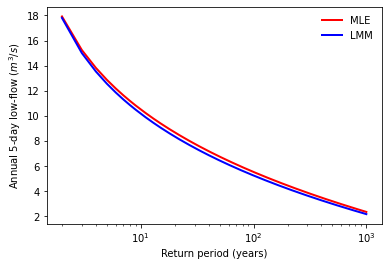

In [21]:
# return periods from 1 year to 1000 years
T = np.arange(2, 1001)

# extreme low-flow under each return period
LFTmle = MLEGEV.ppf(1.0 / T)
LFTmle = pd.DataFrame(LFTmle, index=T, columns=["Annual 5-day low-flow"])
LFTmle.index.name = "Return period"
print(LFTmle.loc[[2, 5, 10, 100, 1000]])

LFTlmm = LMMGEV.ppf(1.0 / T)
LFTlmm = pd.DataFrame(LFTlmm, index=T, columns=["Annual 5-day low-flow"])
LFTlmm.index.name = "Return period"
print(LFTlmm.loc[[2, 5, 10, 100, 1000]])

# Plot low-flow vs return periods
plt.plot(T, LFTmle, 'r-', lw=2, label='MLE')
plt.plot(T, LFTlmm, 'b-', lw=2, label='LMM')
plt.xscale('log')
plt.ylabel('Annual 5-day low-flow ($m^3/s$)')
plt.xlabel('Return period (years)')
plt.legend(loc='best', frameon=False)
plt.show()

## References
+ This tutorial was edited based on [Python Statistics Fundamentals](https://realpython.com/python-statistics/), [Scipy Lecture Notes](https://scipy-lectures.org/), `scipy.stats` [official site](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions), [royalosyin's guide to carry out EVA](https://github.com/royalosyin/A-Beginner-Guide-to-Carry-out-Extreme-Value-Analysis-with-Codes-in-Python).
+ Only the `scipy.stats` sub-module is introduced here. If you wish to get a quick glimpse on other sub-modules of SciPy, you could refer to [scipy-lectures](https://scipy-lectures.org/intro/scipy.html).